The necessary library modules required for data analysis , data visualization  and machine learning are imported.

In [1]:
import pandas as pd   #library for dataframe 
import numpy as np    #library for vectorized computation 
import os             #library for interacting with our OS
import seaborn as sns  # library for data visualization 
import matplotlib.pyplot as plt
from pylab import rcParams
os.chdir(r"C:\Users\Ram Kumar R S\Downloads\SoSe 2020") # changing the path
%matplotlib inline  
# magic function to display the images in the notebook
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score, recall_score, roc_auc_score, roc_curve,classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")
 

In [2]:
# function to read the input dataset file
def load_dataset(file_name):
    """Arg: file_name- the name of the dataset to be loaded as dataframe
       Return: Dataframe of the datast"""
    return pd.read_csv(file_name)

In [3]:
dataset=load_dataset("diabetes.csv")  # function call and the object is pointed to the variable called "dataset"

In [4]:
dataset.head()  # head method displays first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.columns  # different columns in the dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Dataset Exploration and Visualization

In [6]:
dataset.info()  # method to display the features along with number of values in it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.dtypes  # method to display only the data type of all the values present in the dataset

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
dataset.isna().any() # method to display for the presence of any null values, True means presence of null values, 
                      # False means absence of null values

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
dataset.isna().sum()  # method to display the number of missing values if it is present 
                      # 0 indicates no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
dataset.describe()  # method to display the various numerical properties of the column features.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
dataset.shape # shape of the dataset

(768, 9)

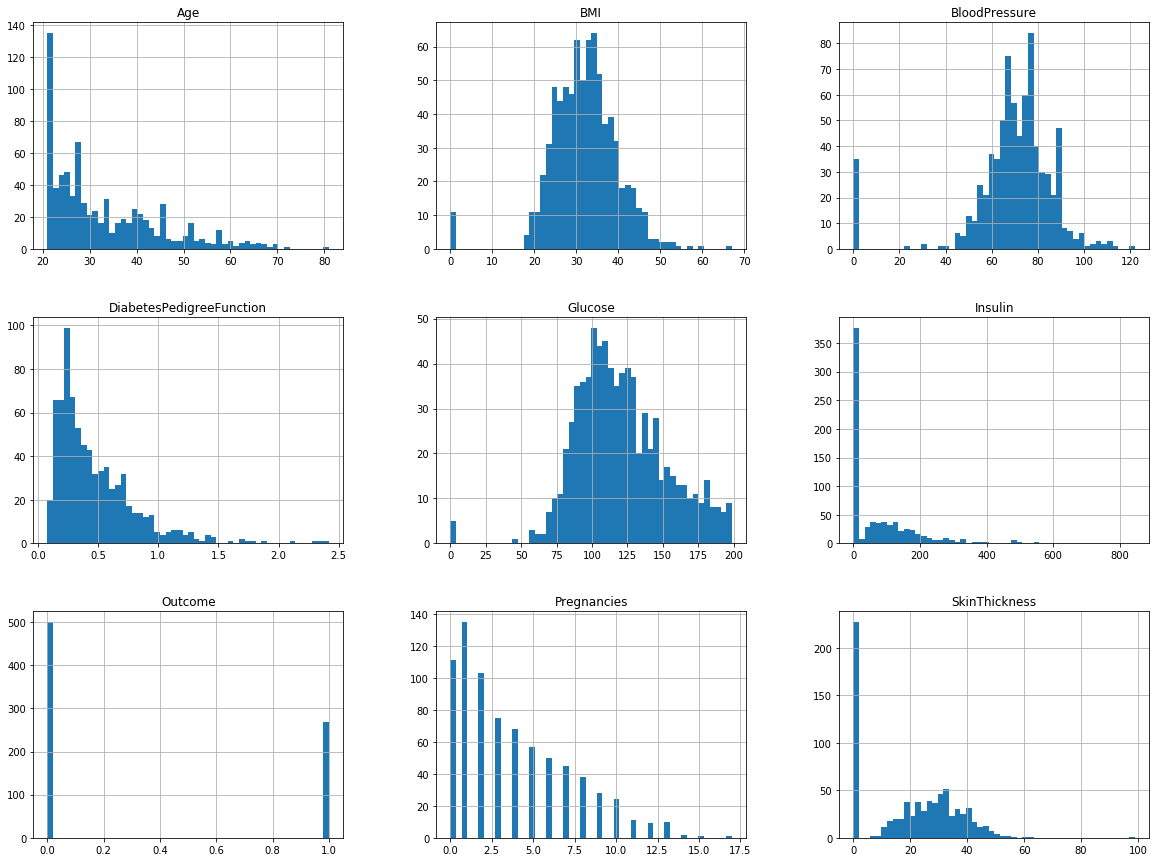

In [12]:
dataset.hist(bins=50, figsize = (20,15));  # method to draw an histogram of all features in the dataset

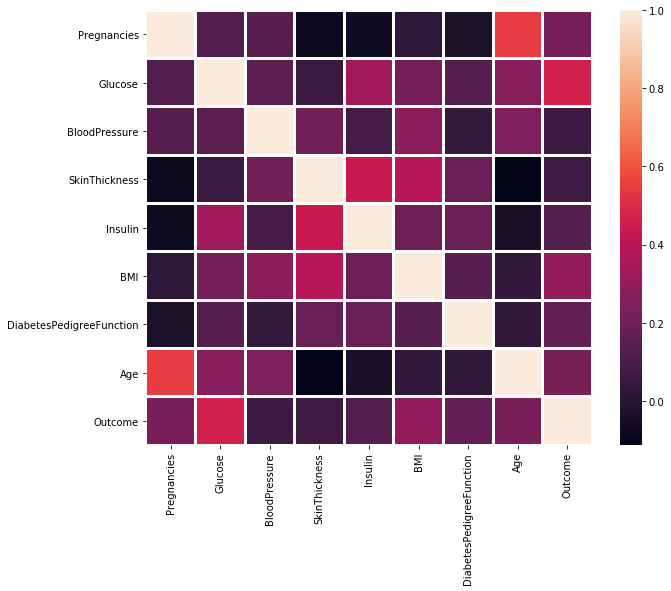

In [13]:
plt.figure(figsize= (10, 8))
sns.heatmap(dataset.corr(),linecolor='white', linewidths=2);  # seaborn function to draw a heatmap based on feature 
                                                               # correlation

A pairs plot allows us to see both distribution of single variables and relationships between two variables.

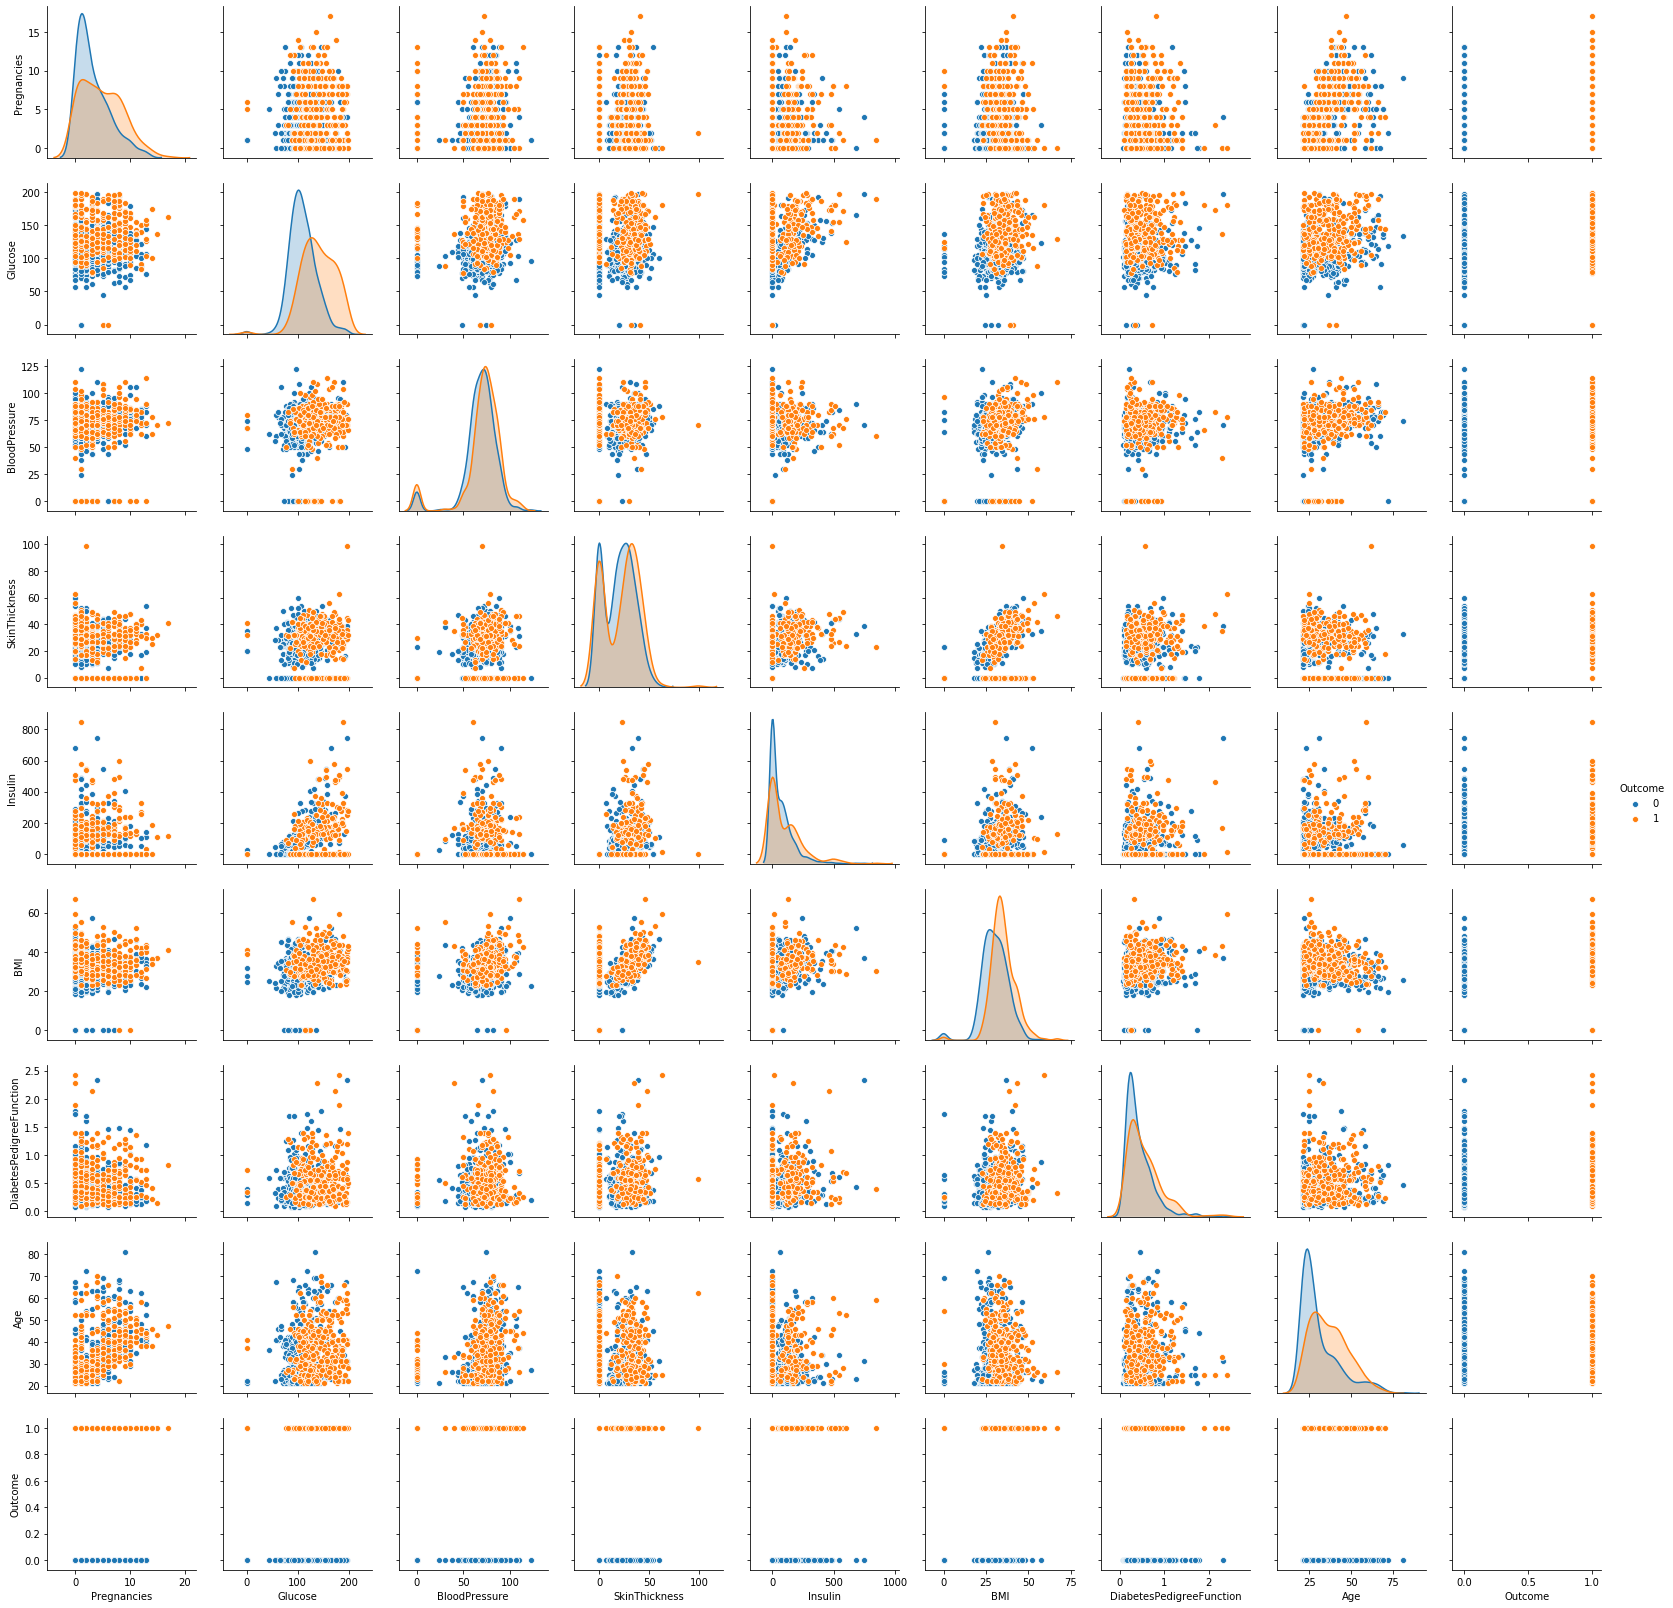

In [14]:
sns.pairplot(dataset,hue='Outcome') # seaborn function to dislay all featues in pairplot

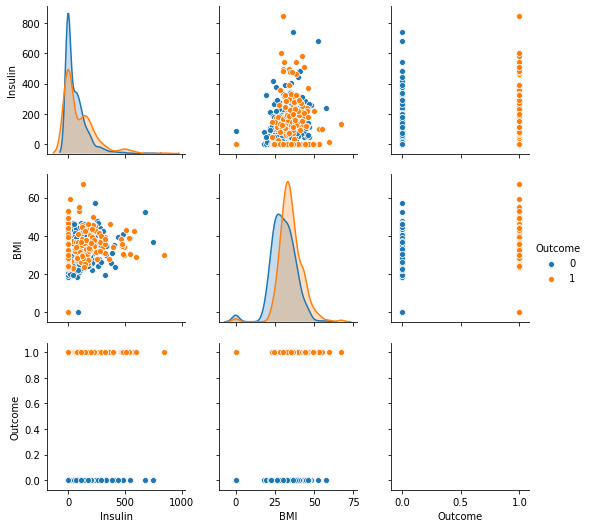

In [15]:
sns.pairplot(dataset[['Insulin','BMI','Outcome']],hue='Outcome')  
# only selected features

## kNN Algorithm - Machine Learning

The Machine learning part consisting of segregating the input features into dependent variables and independent variables,
training the model and testing.

In [16]:
# Create features and labels
features = dataset.drop(['Outcome'], axis=1)     # indepenedent variable 
labels = dataset['Outcome']                      # dependent variable 

In [17]:
# Create training and test set
features_train, features_test, labels_train, labels_test = \
train_test_split(features, labels, test_size=0.25,random_state=15)

In [18]:
# Initialize the algorithm
classifier = KNeighborsClassifier(n_neighbors=5)

In [19]:
# Fit data
classifier.fit(features_train, labels_train)

KNeighborsClassifier()

In [20]:
#prediction
pred = classifier.predict(features_test)

In [21]:
accuracy = accuracy_score(labels_test, pred)  # accuracy
print('Accuracy: {:.2f}'.format(accuracy))

precision = precision_score(labels_test, pred) # precision
print ('Precision: {:.2f}'.format(precision))


recall = recall_score(labels_test, pred)  # recall
print ('Recall: {:.2f}'.format(recall))


auroc = roc_auc_score(labels_test, pred)   # area under curve
print ('AUROC score: {:.2f}'.format(auroc))

Accuracy: 0.72
Precision: 0.58
Recall: 0.54
AUROC score: 0.67


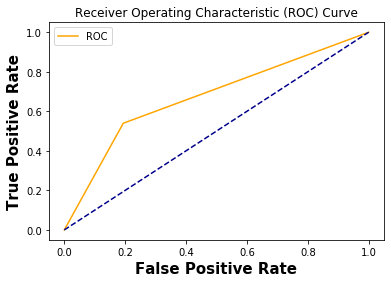

In [22]:
fpr, tpr, thresholds = roc_curve(labels_test, pred)
# Defining a function to plot the AUROC-curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate',fontsize=15,fontweight='bold')
    plt.ylabel('True Positive Rate',fontsize=15,fontweight='bold')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Calling the function to finally plot the curve
plot_roc_curve(fpr, tpr)

Elegant way of performing kNN algorithm using a function to collect all necessary functions.

#### function to perform kNN algorithm - Input : 1 k value

In [23]:
def performing_kNN(k_value): # for one k value
    """function to perform kNN algorithm for one input k value at a time
    Arg- k_value: k value to be used for the algorithm
    Returns: Different performance metrics with the AUC plot
    """
    print("Performing K nearest neighbor algorithm for k value :{}".format(k_value))
    classifier = KNeighborsClassifier(n_neighbors=k_value)
    classifier.fit(features_train, labels_train)
    pred = classifier.predict(features_test)
    accuracy = accuracy_score(labels_test, pred)
    precision = precision_score(labels_test, pred)
    recall = recall_score(labels_test, pred)
    auroc = roc_auc_score(labels_test, pred)
    print("accuracy:",accuracy,
          "precision:",precision,
           "recall:",recall,
         "auroc:",auroc)
    
    
    fpr, tpr, thresholds = roc_curve(labels_test, pred)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate',fontsize=15,fontweight='bold',family='Arial')
    plt.ylabel('True Positive Rate',fontsize=15,fontweight='bold',family='Arial')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    #return accuracy,precision,recall,auroc




Performing K nearest neighbor algorithm for k value :3
accuracy: 0.6770833333333334 precision: 0.5087719298245614 recall: 0.4603174603174603 auroc: 0.6216315983757844


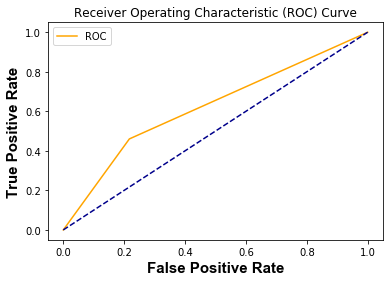

Performing K nearest neighbor algorithm for k value :5
accuracy: 0.71875 precision: 0.576271186440678 recall: 0.5396825396825397 auroc: 0.6729420450350682


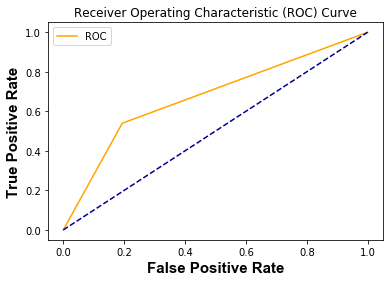

[None, None]

In [24]:
[performing_kNN(k) for k in [3,5]]

### function to perform kNN algorithm - Input : list of k values in a list

In [25]:
performance_metric_dict={}   # dict to hold the values of performance metrics
def performing_kNN_list(k_value_list):  # for a list of k values
    """function to perform kNN algorithm for a list of k as input values
    Arg- k_value_list: list with k values to be used for the algorithm
    Returns: Different performance metrics with the AUC plot
    """
    
    for k_value in k_value_list:
        print("Performing K nearest neighbor algorithm for k value :{}".format(k_value))
        classifier = KNeighborsClassifier(n_neighbors=k_value) # algorithm initialization
        classifier.fit(features_train, labels_train) # model training
        pred = classifier.predict(features_test) # model testing
        accuracy = accuracy_score(labels_test, pred) # accuracy
        precision = precision_score(labels_test, pred) # precision
        recall = recall_score(labels_test, pred)  # recall
        auroc = roc_auc_score(labels_test, pred)   # auroc
        print("accuracy:",accuracy,
              "precision:",precision,
               "recall:",recall,
             "auroc:",auroc)
        
        # dict filling step
        performance_metric_dict[k_value]=[accuracy,precision,recall,auroc]
        #key: k_value, value: its different performance metrics in a list format 
        
        # plotting function
        fpr, tpr, thresholds = roc_curve(labels_test, pred)
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate',fontsize=15,fontweight='bold',family='Arial')
        plt.ylabel('True Positive Rate',fontsize=15,fontweight='bold',family='Arial')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print("*"*100)
    
    #return accuracy,precision,recall,auroc




Performing K nearest neighbor algorithm for k value :3
accuracy: 0.6770833333333334 precision: 0.5087719298245614 recall: 0.4603174603174603 auroc: 0.6216315983757844


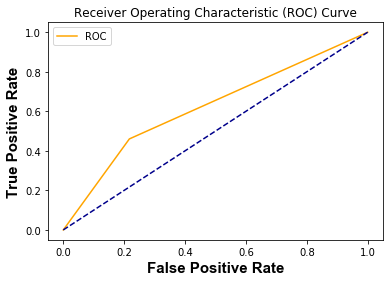

****************************************************************************************************
Performing K nearest neighbor algorithm for k value :5
accuracy: 0.71875 precision: 0.576271186440678 recall: 0.5396825396825397 auroc: 0.6729420450350682


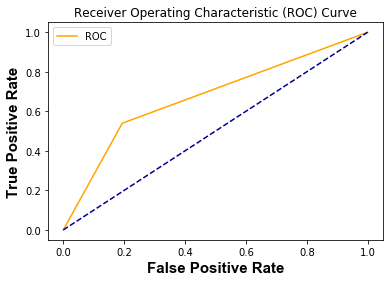

****************************************************************************************************
Performing K nearest neighbor algorithm for k value :7
accuracy: 0.7239583333333334 precision: 0.5833333333333334 recall: 0.5555555555555556 auroc: 0.6808785529715763


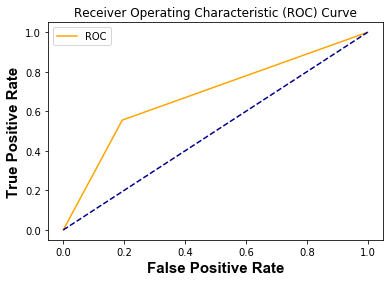

****************************************************************************************************
Performing K nearest neighbor algorithm for k value :9
accuracy: 0.7552083333333334 precision: 0.6481481481481481 recall: 0.5555555555555556 auroc: 0.7041343669250646


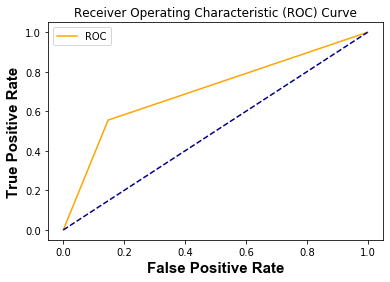

****************************************************************************************************
Performing K nearest neighbor algorithm for k value :15
accuracy: 0.765625 precision: 0.6666666666666666 recall: 0.5714285714285714 auroc: 0.7159468438538206


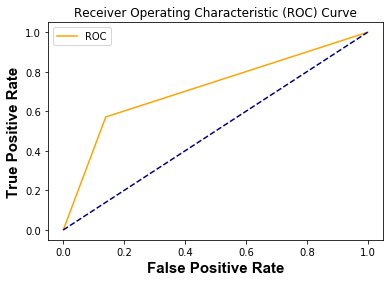

****************************************************************************************************
Performing K nearest neighbor algorithm for k value :40
accuracy: 0.71875 precision: 0.6451612903225806 recall: 0.31746031746031744 auroc: 0.61609449981543


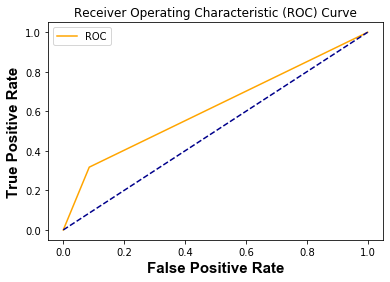

****************************************************************************************************


In [26]:
performing_kNN_list([3,5,7,9,15,40])

The `performance_metric_dict` holds the k values as keys and different evaluation metrics enclosed in a list as their values.

In [27]:
performance_metric_dict


{3: [0.6770833333333334,
  0.5087719298245614,
  0.4603174603174603,
  0.6216315983757844],
 5: [0.71875, 0.576271186440678, 0.5396825396825397, 0.6729420450350682],
 7: [0.7239583333333334,
  0.5833333333333334,
  0.5555555555555556,
  0.6808785529715763],
 9: [0.7552083333333334,
  0.6481481481481481,
  0.5555555555555556,
  0.7041343669250646],
 15: [0.765625, 0.6666666666666666, 0.5714285714285714, 0.7159468438538206],
 40: [0.71875, 0.6451612903225806, 0.31746031746031744, 0.61609449981543]}

In [28]:

# plotting different performance metrics in a line plot
def plotting_performance_metrics():

    plt.figure(figsize= (10, 8))
    plt.plot(list(performance_metric_dict.keys()),[i[0] for i in performance_metric_dict.values()],"bo-",color='blue',\
             linewidth=3,markersize=8,label='Accuracy')

    plt.plot(list(performance_metric_dict.keys()),[i[1] for i in performance_metric_dict.values()],"+-",color='red',\
             linewidth=3,markersize=15,label='Precision')

    plt.plot(list(performance_metric_dict.keys()),[i[2] for i in performance_metric_dict.values()],"*-",color='cyan',\
             linewidth=3,markersize=10,label='Recall')

    plt.plot(list(performance_metric_dict.keys()),[i[3] for i in performance_metric_dict.values()],"^-",color='yellow',\
             linewidth=3,markersize=8,label='AUC')
    plt.legend()
    plt.xlabel('Different k values in the algorithm',fontsize=15)

    plt.ylabel("Diffeent Performance Metrics",fontsize=15);

  
         

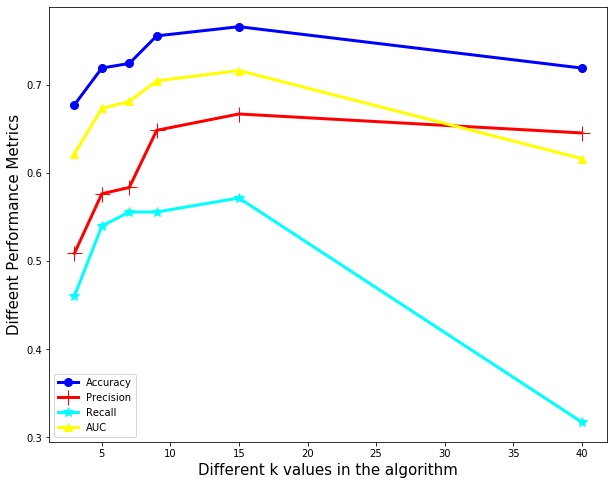

In [29]:
plotting_performance_metrics()

On observing this line plot, the accuracy, precision, recall, AUC was high in `k value = 15`. Therefore, the best k is 15.

In [30]:
#!pip install --upgrade scikit-learn

## Feature Importance using kNN classifier

Diffent features with their importances:

Pregnancies : 0.00520833333333337
Glucose : 0.1555555555555556
BloodPressure : 0.015972222222222256
SkinThickness : 0.01145833333333337
Insulin : 0.05833333333333339
BMI : 0.004861111111111161
DiabetesPedigreeFunction : 0.0003472222222222321
Age : 0.020833333333333415


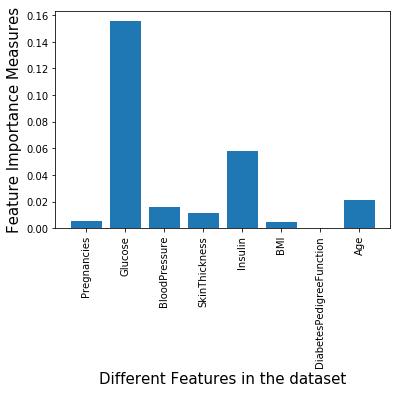

In [31]:
results = permutation_importance(classifier, features_train, labels_train, scoring='accuracy',random_state=15)
# get importance
importance = results.importances_mean

# summarize feature importance
feature_importance_dict={}
print("Diffent features with their importances:")
print()
for i in range(len(importance)):
    print(features_train.columns[i],":",importance[i])
    feature_importance_dict[features_train.columns[i]]=importance[i]
    
# plot feature importance
plt.bar(features_train.columns,importance)
plt.xticks(rotation=90)
plt.xlabel("Different Features in the dataset",fontsize=15)
plt.ylabel("Feature Importance Measures",fontsize=15)
plt.show()


#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html

In [32]:
#{k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1],reverse=True)}
print("The names of the features with decreasing strength of feature importance are as follows:")
[k for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1],reverse=True)]

The names of the features with decreasing strength of feature importance are as follows:


['Glucose',
 'Insulin',
 'Age',
 'BloodPressure',
 'SkinThickness',
 'Pregnancies',
 'BMI',
 'DiabetesPedigreeFunction']

## Scaling

### Standardization

First, Standardization step was performed.

In [33]:
x_sc= StandardScaler()
features_train_scaled = x_sc.fit_transform(features_train)
features_test_scaled = x_sc.transform(features_test)

In [34]:
features_train.describe()  # features training dataset before scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.880208,120.618056,69.319444,20.029514,80.361111,31.884028,0.471340,33.260417
std,3.387120,32.112952,19.114357,15.709344,111.294899,7.836445,0.322218,11.623884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.378000,29.000000
75%,6.000000,139.250000,80.000000,32.000000,130.000000,36.500000,0.637000,40.250000
max,17.000000,199.000000,122.000000,60.000000,680.000000,67.100000,2.288000,81.000000


In [35]:
pd.DataFrame(features_train_scaled,columns=features.columns).describe()
# features training dataset after scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02
mean,-2.679184e-17,-4.307897e-17,6.129356e-17,-5.628214e-17,6.553400e-18,4.257782e-16,1.937108e-16,2.328384e-16
std,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00
min,-1.146573e+00,-3.759321e+00,-3.629716e+00,-1.276115e+00,-7.226833e-01,-4.072222e+00,-1.203150e+00,-1.055678e+00
25%,-8.510805e-01,-6.426060e-01,-3.832620e-01,-1.276115e+00,-7.226833e-01,-5.758921e-01,-7.084902e-01,-7.973639e-01
50%,-2.600951e-01,-1.127645e-01,1.403597e-01,1.892548e-01,-3.989371e-01,1.481195e-02,-2.899320e-01,-3.668412e-01
75%,6.263829e-01,5.807046e-01,5.592570e-01,7.626602e-01,4.463999e-01,5.895511e-01,5.145694e-01,6.018349e-01
max,3.876803e+00,2.442942e+00,2.758468e+00,2.546588e+00,5.392521e+00,4.497777e+00,5.642878e+00,4.110595e+00


In [36]:
pd.DataFrame(features_test_scaled,columns=features.columns).describe()
# features testing dataset after scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,-0.041554,0.034468,-0.044817,0.129193,-0.020203,0.055456,0.006660,-0.006727
std,0.981898,0.985397,1.052492,1.058181,1.138954,1.026549,1.112492,1.049702
min,-1.146573,-1.858125,-3.629716,-1.276115,-0.722683,-4.072222,-1.221787,-1.055678
25%,-0.851081,-0.775066,-0.304719,-1.276115,-0.722683,-0.649331,-0.706937,-0.797364
50%,-0.260095,-0.112764,0.035635,0.189255,-0.659733,0.059514,-0.320994,-0.452946
75%,0.626383,0.705373,0.585438,0.826372,0.277782,0.634253,0.392652,0.666413
max,2.694832,2.380608,2.025398,5.031345,6.885350,3.514335,6.052894,3.335654


### Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
x_mm = MinMaxScaler()
features_train_minmaxscaled = x_mm.fit_transform(features_train)
features_test_minmaxscaled = x_mm.transform(features_test)

## kNN algorithm for Transformed data

The kNN algorithm was applied for these scaled/normalized data.

In [39]:
   
def performing_kNN_list_scaling(k_value_list,feature_train_=features_train_scaled,feature_test_=features_test_scaled):  # for a list of k values
    """function to perform kNN algorithm for a list of k as input values
    Arg- k_value_list: list with k values to be used for the algorithm
    Returns: Different performance metrics with the AUC plot
    """
    performance_metric_dict={} # dict to hold the values of performance metrics
    for k_value in k_value_list:
        #print("Performing K nearest neighbor algorithm for k value :{}".format(k_value))
        classifier = KNeighborsClassifier(n_neighbors=k_value) # algorithm initialization
        classifier.fit(feature_train_, labels_train) # model training
        pred = classifier.predict(feature_test_) # model testing
        accuracy = accuracy_score(labels_test, pred) # accuracy
        precision = precision_score(labels_test, pred) # precision
        recall = recall_score(labels_test, pred)  # recall
        auroc = roc_auc_score(labels_test, pred)   # auroc

        # dict filling step
        performance_metric_dict[k_value]=[accuracy,precision,recall,auroc]
        #key: k_value, value: its different performance metrics in a list format 
         
        
    return performance_metric_dict

### kNN for Standardized data

In [40]:
standardized_knn=performing_kNN_list_scaling([3,5,7,9,15,20],features_train_scaled,features_test_scaled)
standardized_knn

{3: [0.7552083333333334,
  0.6333333333333333,
  0.6031746031746031,
  0.7163159837578443],
 5: [0.765625, 0.6551724137931034, 0.6031746031746031, 0.7240679217423404],
 7: [0.734375, 0.6153846153846154, 0.5079365079365079, 0.6764488741232927],
 9: [0.734375, 0.6111111111111112, 0.5238095238095238, 0.6805094130675525],
 15: [0.75, 0.6595744680851063, 0.49206349206349204, 0.684016242155777],
 20: [0.7604166666666666,
  0.7073170731707317,
  0.4603174603174603,
  0.6836471022517534]}

### kNN for Normalized data

In [41]:
normalized_knn=performing_kNN_list_scaling([3,5,7,9,15,20],features_train_minmaxscaled,features_test_minmaxscaled) 
normalized_knn

{3: [0.71875, 0.5849056603773585, 0.49206349206349204, 0.6607604282022886],
 5: [0.71875, 0.5849056603773585, 0.49206349206349204, 0.6607604282022886],
 7: [0.71875, 0.5849056603773585, 0.49206349206349204, 0.6607604282022886],
 9: [0.7239583333333334,
  0.5961538461538461,
  0.49206349206349204,
  0.6646363971945367],
 15: [0.7604166666666666,
  0.6808510638297872,
  0.5079365079365079,
  0.695828719084533],
 20: [0.7395833333333334,
  0.6585365853658537,
  0.42857142857142855,
  0.6600221483942414]}

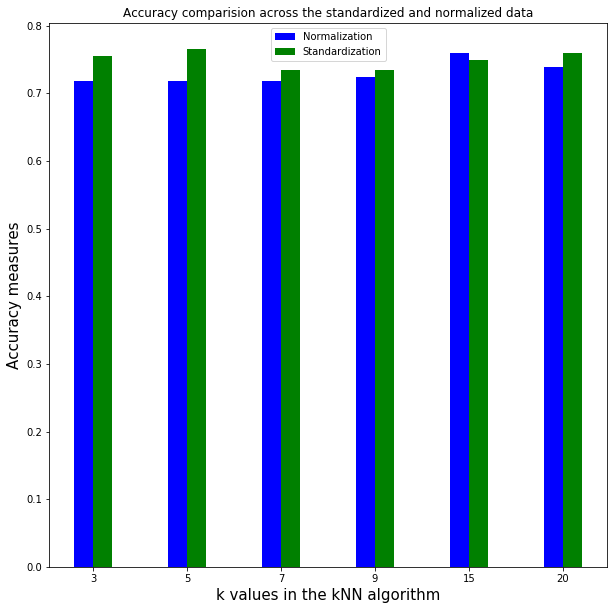

In [42]:
# Barplot to observe the performance of standardized and normalized data.
rcParams['figure.figsize'] = 10, 10 
bar_width = 0.5 
width = 0.20
k_values= [i for i in normalized_knn.keys()]
index=np.arange(len(k_values))
rects1 = plt.bar(index,list([i[0] for i in normalized_knn.values()]),
color='b', 
align='edge',
label='Normalization',width=-1*width)

rects2 = plt.bar(index,[i[0] for i in standardized_knn.values()],
color='g',
align='edge',              
label='Standardization',width=width)

plt.xlabel('k values in the kNN algorithm',fontsize=15)
plt.ylabel('Accuracy measures',fontsize=15)
plt.title('Accuracy comparision across the standardized and normalized data')
plt.xticks(index,k_values)
    
plt.legend()
plt.show()
#https://stackoverflow.com/questions/48962594/unable-to-plot-double-bar-bar-plot-using-pyplot-for-ndarray/48963758

On Observing, the barplot it can be concluded that the `standardized data` peformed well and hence the standardized data
will be used for further analysis.

## Missing Value Imputation

In [43]:

imputer = SimpleImputer(missing_values = 0, strategy = 'mean')                # mean imputation 
imputer = imputer.fit(features)
features_mean = imputer.transform(features)

In [44]:
imputer = SimpleImputer(missing_values = 0, strategy = 'median')             # median imputation
imputer = imputer.fit(features)
features_median = imputer.transform(features)

In [45]:
imputer = SimpleImputer(missing_values = 0, strategy = 'most_frequent')      # mode imputation
imputer = imputer.fit(features)
features_most_frequent = imputer.transform(features)

In [46]:
def performing_kNN_list_imputation(k_value_list,features):  # for a list of k values
    """function to perform kNN algorithm for a list of k as input values
    Arg- k_value_list: list with k values to be used for the algorithm,
    features: input features for the model training
    Returns: Different performance metrics with the AUC plot
    """
    # Create training and test set
    features_train, features_test, labels_train, labels_test = \
      train_test_split(features, labels, test_size=0.25,random_state=15)
    
    performance_metric_dict={}   # dict to hold the values of performance metrics

    for k_value in k_value_list:
        classifier = KNeighborsClassifier(n_neighbors=k_value) # algorithm initialization
        classifier.fit(features_train, labels_train) # model training
        pred = classifier.predict(features_test) # model testing
        accuracy = accuracy_score(labels_test, pred) # accuracy
        precision = precision_score(labels_test, pred) # precision
        recall = recall_score(labels_test, pred)  # recall
        auroc = roc_auc_score(labels_test, pred)   # auroc
        
        # dict filling step
        performance_metric_dict[k_value]=[accuracy,precision,recall,auroc]
        #key: k_value, value: its different performance metrics in a list format 
    return performance_metric_dict
         
        

In [47]:
k_value_list=[3,5,7,9,15,20]

In [48]:
knn_mean=performing_kNN_list_imputation(k_value_list,features_mean)
print(knn_mean)

{3: [0.6979166666666666, 0.5409836065573771, 0.5238095238095238, 0.6533776301218162], 5: [0.7135416666666666, 0.5714285714285714, 0.5079365079365079, 0.6609449981543005], 7: [0.7083333333333334, 0.559322033898305, 0.5238095238095238, 0.6611295681063122], 9: [0.7135416666666666, 0.5666666666666667, 0.5396825396825397, 0.6690660760428202], 15: [0.7239583333333334, 0.5892857142857143, 0.5238095238095238, 0.6727574750830565], 20: [0.7135416666666666, 0.5769230769230769, 0.47619047619047616, 0.6528239202657807]}


In [49]:
knn_median=performing_kNN_list_imputation(k_value_list,features_median)
 

In [50]:
knn_features_most_frequent=performing_kNN_list_imputation(k_value_list,features_most_frequent)

In [51]:
# plotting different performance metrics in a line plot
def plotting_imputation(x):
    """Function to plot differnt evaluation metrics for different imputed data
    Args x - value from [0,1,2,3]
    Return : line plot indicating all evaluation metrics"""

    measure=["accuracy","precision","recall","auroc"]
    plt.figure(figsize= (10, 5))
    plt.plot(list(knn_mean.keys()),[i[x] for i in knn_mean.values()],"bo-",color='blue',\
             linewidth=3,markersize=8,label='Mean Imputation')

    plt.plot(list(knn_median.keys()),[i[x] for i in knn_median.values()],"+-",color='red',\
             linewidth=3,markersize=15,label='Median Imputation')

    plt.plot(list(knn_features_most_frequent.keys()),[i[x] for i in knn_features_most_frequent.values()],"*-",color='cyan',\
             linewidth=3,markersize=10,label='Most Frequent Imputation')
    
    plt.plot(list(standardized_knn.keys()),[i[x] for i in standardized_knn.values()],"*-",color='black',\
             linewidth=3,markersize=10,label='Standardized kNN')
    
    plt.plot(list(normalized_knn.keys()),[i[x] for i in normalized_knn.values()],"*-",color='yellow',\
             linewidth=3,markersize=10,label='Normalized kNN')

     
    plt.legend()
    plt.xlabel('Different k values in the algorithm',fontsize=15)

     
    plt.ylabel("Measures of {} \n across different k values".format(measure[x]),fontsize=15)
    plt.title("Comparison of {} across different k values {}".format(measure[x],list(knn_mean.keys())),fontsize=15)

  
         

Plotting the `accuracy` plot

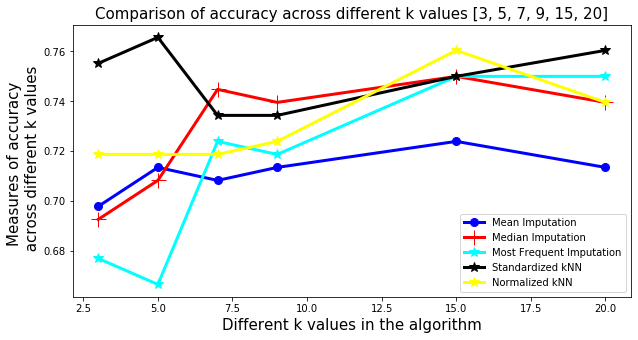

In [52]:
plotting_imputation(0)

plotting the `precision` plot

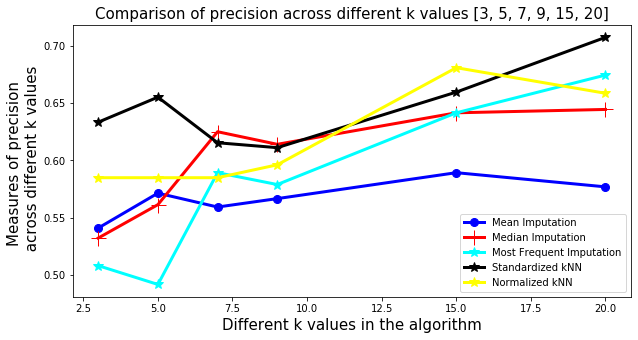

In [53]:
plotting_imputation(1)

plotting the `recall` plot

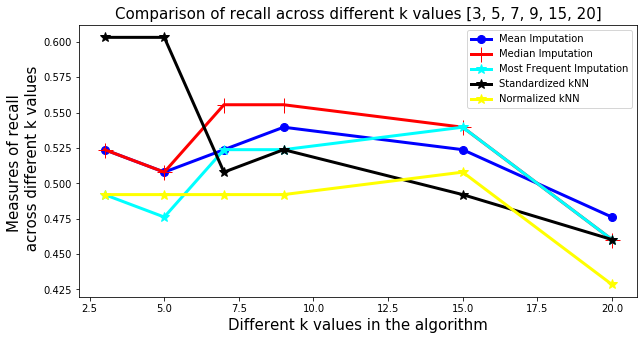

In [54]:
plotting_imputation(2)

plotting the `AUC` plot

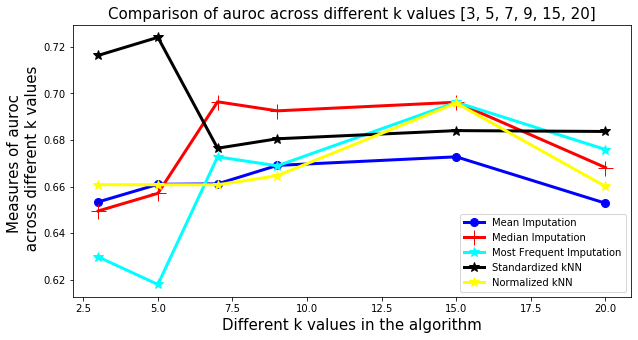

In [55]:
plotting_imputation(3)

On Observing all the evaluation metrics plots, the standardized kNN showed a better performance.
Also, the imputation had no significant effect on the improvement of the performance metrics is the important message.
The best k value is 5.

## Treating imbalanced data.

The number of diabetic vs non- diabetic patients in the dataset.

In [56]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [57]:
# Upsample minority class
df_majority = dataset[dataset.Outcome==0]
df_minority = dataset[dataset.Outcome==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Outcome.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [58]:
# Create features and labels
features_up = df_upsampled.drop(['Outcome'], axis=1)     # indepenedent variable 
labels_up = df_upsampled['Outcome']                      # dependent variable 

# kNN model

clf_1 = KNeighborsClassifier().fit(features_up, labels_up)
pred_y_1 = clf_1.predict(features_up)
print( np.unique( pred_y_1 ) )
print( accuracy_score(labels_up, pred_y_1) )

[0 1]
0.819


In [59]:
#Downsample majority class
 
# Separate majority and minority classes
df_majority = dataset[dataset.Outcome==0]
df_minority = dataset[dataset.Outcome==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=268,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled.Outcome.value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [60]:
# Create features and labels
features_down = df_downsampled.drop(['Outcome'], axis=1)     # indepenedent variable 
labels_down = df_downsampled['Outcome']                      # dependent variable 



clf_2 = KNeighborsClassifier().fit(features_down, labels_down)
pred_y_2 = clf_2.predict(features_down)
print( np.unique( pred_y_2 ) )
print( accuracy_score(labels_down, pred_y_2) )

[0 1]
0.7854477611940298


The upsampling and downsampling had an accuracy of 0.82 and 0.79 respectively. Therefore, the `upsampling` suited this dataset apt.

# SVM 

In [61]:
from sklearn.svm import SVC
clf_3 = SVC(kernel='linear',class_weight='balanced', # penalize
probability=True)
clf_3.fit(features, labels)

pred_y_3 = clf_3.predict(features)
print( np.unique( pred_y_3 ) )

print( accuracy_score(labels, pred_y_3) )

[0 1]
0.7682291666666666


In [62]:
prob_y_3 = clf_3.predict_proba(features)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(labels, prob_y_3) )

0.8389701492537314


## Testing SVM with different C value

In [63]:
c_value_list=[0.1,0.01,0.001,1,2,5,10,100]        # list of C values
c_value_dict={}                               # dict to hold C values as key and accuracy as their values.
for c in c_value_list:
    clf = make_pipeline(StandardScaler(), SVC(C=c))
    clf.fit(features_train_scaled, labels_train)
    pred= clf.predict(features_test_scaled)
    c_value_dict[c]=( accuracy_score(labels_test, pred) )
    
    #features_train_scaled,features_test_scaled
    
print(c_value_dict)

{0.1: 0.7395833333333334, 0.01: 0.671875, 0.001: 0.671875, 1: 0.7447916666666666, 2: 0.7291666666666666, 5: 0.7291666666666666, 10: 0.7447916666666666, 100: 0.7083333333333334}


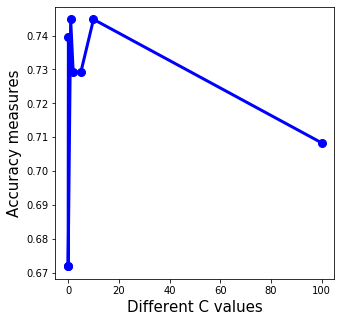

In [64]:
# line plot to compare C value and accuracy
rcParams['figure.figsize'] = 5,5
plt.plot(list(c_value_dict.keys()),list(c_value_dict.values()),"bo-",color='blue',linewidth=3, \
         markersize=8,label='Mean Imputation')
plt.xlabel("Different C values",fontsize=15)
plt.ylabel("Accuracy measures",fontsize=15);

From the plot, the best C value could be considered as 10

## Testing with different kernel functions

In [65]:
kernel_list=["linear","rbf","poly","sigmoid"]
kernel_dict={}
for ker in kernel_list:
    clf = make_pipeline(StandardScaler(), SVC(kernel=ker))
    clf.fit(features_train_scaled, labels_train)
    pred= clf.predict(features_test_scaled)
    kernel_dict[ker]=(accuracy_score(labels_test, pred) )
    
print(kernel_dict)

{'linear': 0.7447916666666666, 'rbf': 0.7447916666666666, 'poly': 0.7447916666666666, 'sigmoid': 0.7083333333333334}


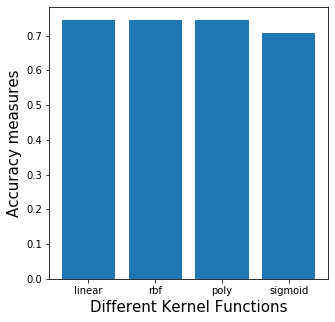

In [66]:
rcParams['figure.figsize'] = 5,5
plt.bar(kernel_dict.keys(),kernel_dict.values())
plt.xlabel("Different Kernel Functions",fontsize=15)
plt.ylabel("Accuracy measures",fontsize=15);

The linear, rbf, polynomial kernel observed to perform the similar way. Therefore, the default rbf is considered as best one.

## Best Kernel, Best C value

In [67]:
clf = make_pipeline(StandardScaler(), SVC(kernel="rbf",C=10))
clf.fit(features_train_scaled, labels_train)
pred= clf.predict(features_test_scaled)
svm_svc_accuracy=(accuracy_score(labels_test, pred) )
    
print(svm_svc_accuracy)

0.7447916666666666


The best model of SVM had an accuracy of 0.744 .

## Logistic Regression

In [68]:
# Importing logit regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()          # intialization
classifier.fit(features_train_scaled, labels_train) # fitting
# Predicting with classifier
pred = classifier.predict(features_test_scaled)  # testing
logistic_regression_accuracy = accuracy_score(labels_test, pred) # accuracy

In [69]:
logistic_regression_accuracy

0.7447916666666666

In [70]:
print(classifier.coef_)

[[ 0.42621596  1.18812298 -0.30186175 -0.01760607 -0.22953301  0.65747189
   0.45685503  0.23766145]]


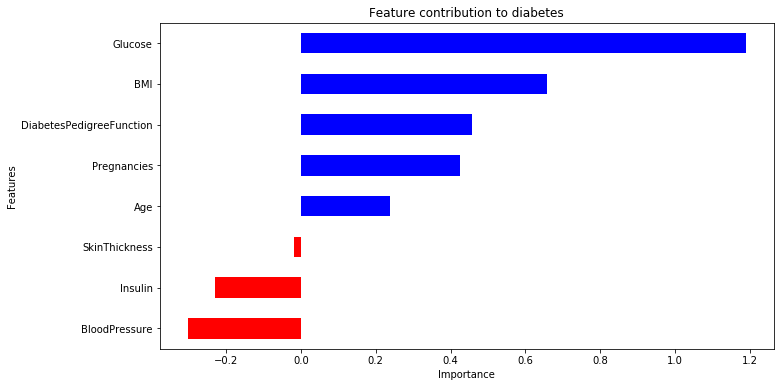

In [71]:
# plot to visualize the most contributing features to the prediction 
coeff = list(classifier.coef_[0])# defining coefficient variable
labels = list(features_train.columns)# defining label list
features1 = pd.DataFrame() # Creating a new data frame
features1['Features'] = labels # labels in dataframe
features1['importance'] = coeff # values in dataframe
features1.sort_values(by=['importance'], ascending=True, inplace=True)
features1['positive'] = features1['importance'] > 0 # ranking of feat.
features1.set_index('Features', inplace=True)
features1.importance.plot(kind='barh', figsize=(11, 6),color =
features1.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature contribution to diabetes')
plt.show()

from the plot, the Glucose, BMI, Diabetes Pedigree Function seemed to be most prominent features contributing to the model prediction while Blood Pressure had less significance.

## Penalized Regression

In [72]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

from sklearn.model_selection import train_test_split,cross_val_score

from statistics import mean

In [73]:
# Create features and labels
features = dataset.drop(['Outcome'], axis=1)     # indepenedent variable 
labels = dataset['Outcome']                      # dependent variable 
x_sc= StandardScaler()
features_train_scaled = x_sc.fit_transform(features_train)
features_test_scaled = x_sc.transform(features_test)

In [74]:
from sklearn.linear_model import LinearRegression
# Bulding and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(features_train_scaled, labels_train)
# Evaluating the Linear Regression model
#pred = linearModel.predict(features_test_scaled)
 
pred = linearModel.predict(features_test_scaled)
#accuracy = accuracy_score(labels_test, pred) # accuracy
    
print(linearModel.score(features_test_scaled, labels_test))

0.2172021374301295


In [75]:
cross_val_scores_ridge = []
# List to maintain the different values of alpha
alpha = []
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):

    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(features_train_scaled, labels_train)
    scores = cross_val_score(ridgeModel, features, labels, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):

    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 25.804014252896966
0.5 : 25.804994716095393
0.75 : 25.80594126718456
1.0 : 25.806854548831538
1.25 : 25.807735190696924
1.5 : 25.80858380973204
1.75 : 25.809401010468402
2.0 : 25.810187385299738


In [76]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(features_train_scaled, labels_train)
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(features_test_scaled, labels_test))

0.2177685464645417


In [77]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
# List to maintain the different values of Lambda
Lambda = []
# Loop to compute the cross-validation scores
for i in range(1, 9):

    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(features_train_scaled, labels_train)
    scores = cross_val_score(lassoModel, features, labels, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):

    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 22.776847941683723
0.5 : 20.66808286386468
0.75 : 17.936360286823668
1.0 : 17.76677244340195
1.25 : 17.549557943936307
1.5 : 17.275459597910366
1.75 : 16.94447740532412
2.0 : 16.55661136617757


In [78]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(features_train_scaled, labels_train)
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(features_test_scaled, labels_test))

-0.0034999931640760096


In [79]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(features_test_scaled, labels_test),
         ridgeModelChosen.score(features_test_scaled, labels_test),
         lassoModelChosen.score(features_test_scaled, labels_test)]

# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regreesion'] = linearModel.score(features_test_scaled, labels_test)
mapping['Ridge Regreesion'] = ridgeModelChosen.score(features_test_scaled, labels_test)
mapping['Lasso Regression'] = lassoModelChosen.score(features_test_scaled, labels_test)
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))



Linear Regreesion : 0.2172021374301295
Ridge Regreesion : 0.2177685464645417
Lasso Regression : -0.0034999931640760096


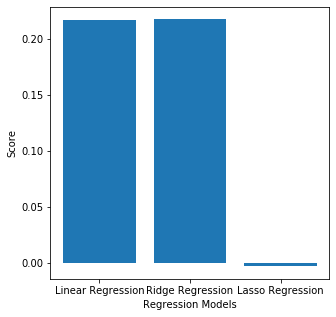

In [80]:
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

The penalized regression had the accuracy of just 0.20 which is extremely poor in performance.

## Ensemble Tree Algorithm

In [81]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(features_train_scaled, labels_train)

y_pred=clf.predict(features_test_scaled)

In [82]:
random_forest_classifier_accuracy=accuracy_score(labels_test, y_pred)
random_forest_classifier_accuracy

0.7291666666666666

## feature importance by Random tree classifier

In [83]:
feature_imp = pd.Series(clf.feature_importances_,index=dataset.columns[:-1]).sort_values(ascending=False)

In [84]:
feature_imp

Glucose                     0.243339
BMI                         0.178864
Age                         0.158452
DiabetesPedigreeFunction    0.141230
Pregnancies                 0.097641
BloodPressure               0.090816
SkinThickness               0.044935
Insulin                     0.044722
dtype: float64

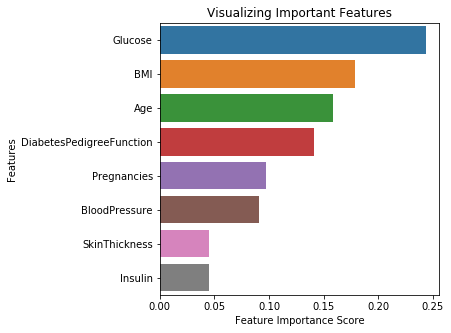

In [85]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python

from the plot, the Glucose, BMI, Age were the most prominent features and Insulin had less significance.

## Discussion about Features Importance Ranking

Top 3 features obtained are:
1. The `kNN classifier` feature importance ranking suggest that Glucose, Insulin, Age 
2. The `Logistic Regression` feature importance ranking suggest that Glucose, BMI, Diabetes Pedigree function 
3. The `Random tree classifier` feature importance ranking suggest that Glucose, BMI, Age

All the 3 models predicted `Glucose` to be the most prominent feature.
The scientific literature `Risk Factors for Type 2 Diabetes Mellitus, Published in  The Journal of cardiovascular nursing` suggests that Family history of diabetes [pedigree] , Age is a contributing factor as predicted by Logistic regression and random tree classifier respectively. The article also points that BMI as an important cause for diabetes and predicted by logistic regression.

## Summary - Finding Best Model

In [86]:
standardized_knn[5][0]      # kNN accuray of k=5

0.765625

In [87]:
random_forest_classifier_accuracy  # random forest acccuracy

0.7291666666666666

In [88]:
logistic_regression_accuracy # logistic regression accuracy

0.7447916666666666

In [89]:
svm_svc_accuracy    # svm best model accuracy 

0.7447916666666666

In [90]:
accuracy_list=[standardized_knn[5][0],random_forest_classifier_accuracy,logistic_regression_accuracy,svm_svc_accuracy]
algo_list=['kNN','Random_Forest','Logistic_Regression','SVM']

### Plots to visualize the results

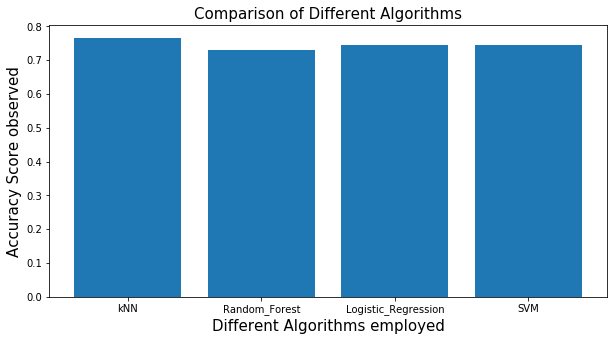

In [91]:
rcParams['figure.figsize'] = 10,5

plt.bar(algo_list,accuracy_list)
plt.xlabel("Different Algorithms employed", fontsize=15)
plt.ylabel("Accuracy Score observed",fontsize=15)
plt.title("Comparison of Different Algorithms",fontsize=15);

## Conclusion:
       The kNN, Random forest, Logistic Regreesion, SVM seemed to peform in a similar way. The Penalized Regression   resulted in a worst performance metric.

### For the diabetics prediction dataset, the kNN algorithm seemed to perform better in comparison to the other machine learning algorithms.